In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## Prepare data

In [9]:
digits = datasets.load_digits()

(X_train, X_test, y_train, y_test) = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=42
)

## Find best k

Text(0,0.5,u'k')

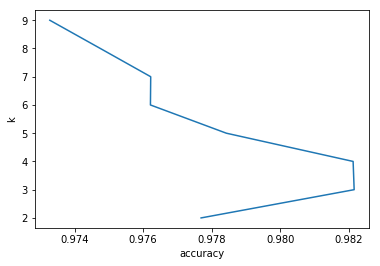

In [12]:
ks = np.arange(2, 10)
scores = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv=5)
    score.mean()
    scores.append(score.mean())

plt.plot(scores, ks)
plt.xlabel('accuracy')
plt.ylabel('k')

## Train model

In [14]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

z = model.predict(X_test)
print(classification_report(y_test, z))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.97      1.00      0.99        37
          2       1.00      1.00      1.00        38
          3       0.98      1.00      0.99        46
          4       0.98      1.00      0.99        55
          5       0.98      1.00      0.99        59
          6       1.00      1.00      1.00        45
          7       1.00      0.98      0.99        41
          8       0.97      0.97      0.97        38
          9       0.98      0.92      0.95        48

avg / total       0.99      0.99      0.99       450

